# Coding Homework 10: [Your Name]


- You can add new cells if you need (with the "+" button above); but, deleting cells could very likely cause your notebook to fail MarkUs autotesting (and you'd have to start over and re-enter your answers into a completely fresh version of the notebook to get things to work again...)
- In this homework, be careful not to rerun any cells that involve invoking a random number generator 

> TAs will mark this assignment by first checking ***MarkUs*** autotests for completion and general correctness, and then manually reviewing your written response to `_____` and plotted figures for `Q2, Q8, Q10`
> - The following questions "automatically fail" during automated testing so that MarkUs exposes example answers for student review and consideration for these problems.  These "failed MarkUs tests" are not counted against the student: `__________________________`


We begin by importing dataset and the libraries we will use.

In [ ]:
import pandas as pd
import numpy as np
import graphviz as gv
from sklearn import tree, datasets
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.inspection import PartialDependenceDisplay

cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, columns = cancer_data.feature_names)
cancer_classes = pd.DataFrame(cancer_data.target).replace({0:'Malignant',1:'Benign'})

## Part 1: GridSearchCV 

GridSearchCV is a powerful tool provided by sklearn for *hyperparameter tuning*, the process of refitting a model with many values of a hyperparameter (such as `max_depth`) in order to optimize performance. By exhaustively searching through a predefined grid of hyperparameter values, GridSearchCV allowes you to identify the best choices of parameters that yields the best model performance. This automated approach helps streamline the process of finding the right hyperparameters.

To practice using GridSearchCV we will be working with some breast cancer classification data availible from sklearn. You might  want to learn more about the dataset here:
- https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset
- https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Before you start on the questions, use the below cells to play around with the dataset a bit. 

Now you might agree that the dataset seems very complicated, so we will start by 

### Q0: Train-Test Split & other preprocessing

We will begin by processing our data to be usable. This should be familiar as you did essentially the same thing for last week's homework. Do the following:
- Make a new dataframe names `dataset_cleaned` that contains only the following columns from the `cancer_df`:
    - `mean radius`, `mean texture`, `mean perimeter`, `mean fractal dimension`
- Create a training dataset and testing dataset from the cleaned dataset, using an 80-20 split.

In [2]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Retain only the following fields of the cancer_dataset: "mean radius", "mean texture", "mean perimeter", "mean fractal dimension"

In [3]:
np.random.seed(1958) # Do NOT change this line: it sets the "random number generation seed"
features = ["mean radius", "mean texture", "mean perimeter", "mean fractal dimension"]

dataset_cleaned = cancer_df[features] # We do not need to drop NA values, because the dataset is already provided to us with clean entries

X_train, X_test, Y_train, Y_test = train_test_split(dataset_cleaned, cancer_classes, train_size=0.8)

In [4]:
# test_Q0
assert X_train.shape == (None, None)

AssertionError: 

### Q1: Use GridSearchCV to find the max_depth which optimizes your model for accuracy

Now use GridSearchCV to find the maximum depth in the range [0,20] which yields the most accurate decision tree (i.e. the decision tree which attains the highest training accuracy).

In [4]:
criterion = ['accuracy']
max_depths = range(1, 10)
parameters = {'max_depth': range(1, 20)}

scoring = {'accuracy': make_scorer(accuracy_score),
          'sensitivity':make_scorer(recall_score,pos_label='Malignant')}

rs = ShuffleSplit(n_splits=2,test_size=0.20, random_state=30259) #Feb 03 1959 is 'The Day the Music Died' https://en.wikipedia.org/wiki/The_Day_the_Music_Died 

clf = tree.DecisionTreeClassifier()

clf_GS_1 = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scoring, 
                      refit = 'accuracy', cv = rs)

clf_GS_1.fit(dataset_cleaned, cancer_classes)
clf_GS_1.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [ ]:
clf_GS_1.best_score_

In [ ]:
recall_score(Y_test, clf_GS_1.predict(X_test), pos_label='Malignant')

In [ ]:
# Q1:
Q1 = None

In [ ]:
# test_Q1


### Q2: Use GraphViz to plot the tree best tree you found in Q1

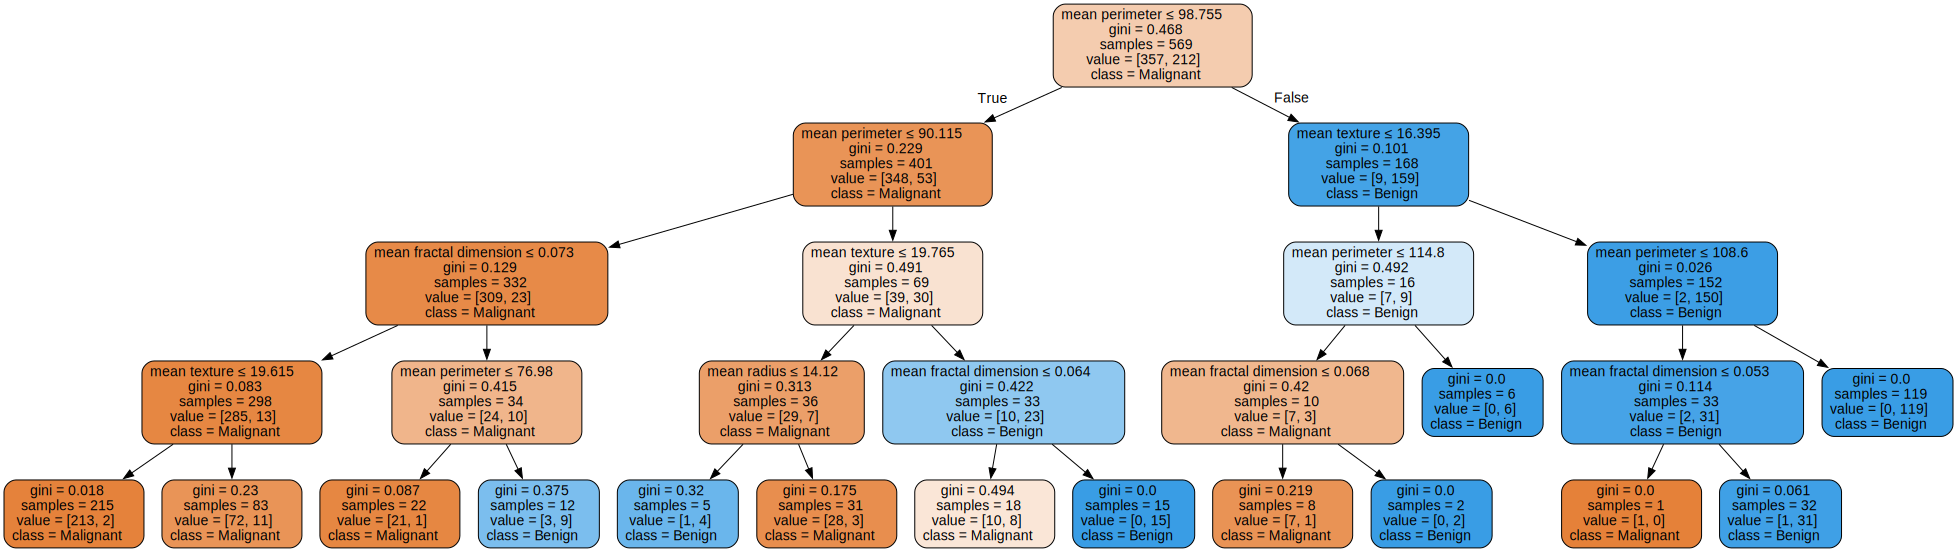

In [5]:
dot_data = tree.export_graphviz(clf_GS_1.best_estimator_, out_file=None, 
                                feature_names=features, class_names=['Malignant', 'Benign'],
                                filled=True, rounded=True, special_characters=True)
graph = gv.Source(dot_data, format='SVG')
graph # You can comment this line and re-run so the figure doesn't render if MarkUs notebook renderer gives you an error of 
# "nbconvert failed: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration."
# It's your responsibility to check this: TAs can't provide manual marks if your notebook doesn't render in MarkUs

### Q3: What is the best accuracy for the decision trees you found in Q1?

Provide your answers as decimal numbers with three signifiant digits.

In [ ]:
Q3 = None

In [ ]:
### test_Q3
assert Q3 == None, "You can access this directly with the `.best_score_` field."

### Q4: What is the best sensitivity for the most accurate decision tree you found in Q1?

Use `X_test` and `Y_test` which you made in Q0 to compute the sensitivity. Provide your answers as decimal numbers with three signifiant digits.

### Q5: Re-answer Q1, Q3, and Q4 if you replace accuracy as the important metric with sensitivity when using GridSeachCV.

In [6]:
rs = ShuffleSplit(n_splits=2,test_size=0.20, random_state=1)

clf = tree.DecisionTreeClassifier()

clf_GS_2 = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scoring, 
                      refit = 'sensitivity', cv = rs)

clf_GS_2.fit(dataset_cleaned, cancer_classes)

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=1, test_size=0.2, train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)}, refit='sensitivity',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'sensitivity': make_scorer(recall_score, pos_label=Malignant)})

In [ ]:
clf_GS_2.best_estimator_

In [ ]:
Q5_max_depth = None
Q5_accuracy = None
Q5_sensitivity = None
Q5 = (Q5_max_depth, Q5_accuracy, Q5_sensitivity)

### Q6: Use your answers to Q1-Q4 and to Q5 to compare differences between the outcome when different metric are prioritized.

#### Write a 1-2 sentence answer to this question in markdown cell below
- Compare your response to the answer given in the *MarkUs* output.
> - Hint: What max_depth did you get for each model and why might that make sense given how they were trained?

> Put your answer here 

In [ ]:
# test_Q6

### Q7: Explain some advantages and disadvantages of the "best" models you found in Q1 and Q5?

#### Write a 1-2 sentence answer to this question in markdown cell below
- Compare your response to the answer given in the *MarkUs* output.
> - Hint: You may or may not want to compute other metrics for each than the one used to fit them.


> Put your answer here 

## Part 2: Mean effects of a variable

In the last homework you worked with `Feature Importance` to determine how important different features were to the classification model you developed. However, as you might have noticed, `Feature Importance` does not tell you much about the relationship between a feature and the classification model's predictions, beyond that a given feature might be important to the prediction process. In linear regression, you can read off the regression coefficients to determine the numerical relationship between a predictor and the output. For more complicated general models, it is hard to reduce the relationship between prodictors and prediction to a single number, thus we will be using `Partial dependence plots` (PDPs) to try and understand these relationships better.

Explain in general.

This is particularly simple in the case where $X$ is a categorical variable taking values, say, 0 and 1. For each value $y_0$ of our estimator, just have two numbers to care about $P(Y=y_0 | X=0)$ and $P(Y=y_0 | X=1),$ the probability that our model will predict $x_0$ when $X$ takes the values 0 and 1 respectively. 

Our dataset is complicated, but nonetheless want to understand how our models' predictions depend on the variables. That is to say, we want to know how the distribution of the predictions of our model given that `Name=x` compare to the predictions of our model given that `Name=x'`. 

To learn how to create partial dependence plots you can read the documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator.

For more information you can also read this page:
 - https://scikit-learn.org/stable/modules/partial_dependence.html

### Q8: Create all the single-variable PDPs from the mode you found in Q1.

> Hint: You can do this is one line.

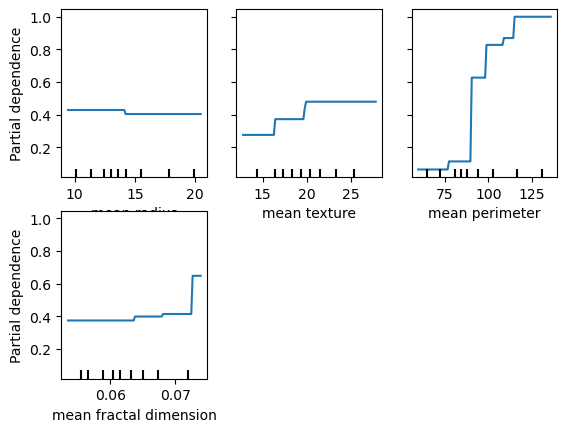

In [7]:
PartialDependenceDisplay.from_estimator(clf_GS_1.best_estimator_, X_test, [0,1,2,3])

### Q9: Interpret the PDPs you made in Q8.

#### Write a 2-3 sentence answer to this question in markdown cell below
- Compare your response to the answer given in the *MarkUs* output.
> - Hint: Which variables are most influential? 
> - Hint: How would you describe the relationships between the variables and predicted label? 
> - Hint: Can you correspond anything in the PDPs to the decision tree itself?

> Put your answer here

In [ ]:
# test_Q9


### Q10: Create all the single-variable PDPs from the mode you found in Q5.

> Hint: You can do this is one line.

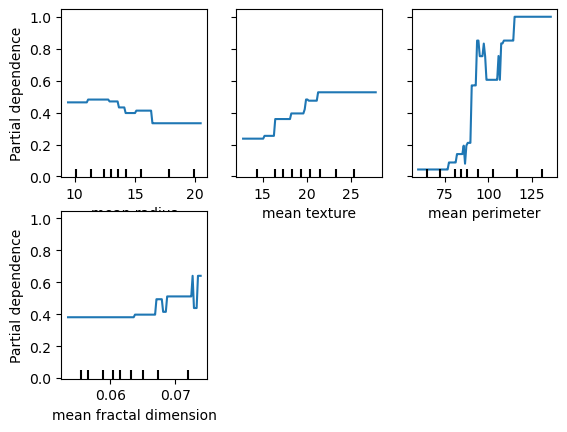

In [8]:
PartialDependenceDisplay.from_estimator(clf_GS_2, X_test, [0,1,2,3])

### Q11: Interpret the PDPs you made in Q10.

#### Write a 2-3 sentence answer to this question in markdown cell below
- Compare your response to the answer given in the *MarkUs* output.
> - Hint: Which variables are most influential? 
> - Hint: How would you describe the relationships between the variables and predicted label? 
> - Hint: Can you correspond anything in the PDPs to the decision tree itself?

> Put your answer here

In [ ]:
# test_Q11

 ### Q12: Compare how you interpret PDPs vs coefficients in linear regression [written]